In [15]:
#Import libraries
from datetime import date
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
from textblob import  TextBlob
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
import spacy
nlp = spacy.load("en_core_web_sm")

In [16]:

#Scrapping the tweets - Create a list to append tweet data
tweets_list = []
maxTweets = 500

#Using TwitterSearchScraper to scrape data and append tweets to list 
for i, tweet in enumerate(sntwitter.TwitterSearchScraper('chatgpt since:2023-01-01 until:{today}').get_items()):
    if i == maxTweets:
        break
    tweets_list.append([tweet.rawContent])

#Creating a dataframe from the tweets list above

tweets_to_df = pd.DataFrame(tweets_list, columns=["Tweets"])

tweets_to_df.head() #list first five tweets


,Tweets
0,@sasha35625 I've made no comments until today ...
1,ughhh i never used chatgpt until today\ni fear...
2,"chatGPT is a new generation, I already tried i..."
3,ChatGPT even knows about @SatisfactoryAF and i...
4,@galechime LITERALLY THE BEST. only downside i...


In [17]:
#clean the tweets with a function

def cleanTweets(text):
    text = re.sub('@[A-Za-z0-9_]+', '', text) #remove @mentions
    text = re.sub('#', '', text) #removes hastag '#' symbol
    text = re.sub('RT[\s]+', '',text)
    text = re.sub('https?:\/\/\S+', '', text)
    text = re.sub('\n',' ', text)
    return text

In [18]:
tweets_to_df['cleanedTweets'] = tweets_to_df['Tweets'].apply(cleanTweets) #apply cleanTweet function to the tweet
tweets_to_df.head() #compares original theets with cleaned tweets

,Tweets,cleanedTweets
0,@sasha35625 I've made no comments until today ...,I've made no comments until today about chatG...
1,ughhh i never used chatgpt until today\ni fear...,ughhh i never used chatgpt until today i fear ...
2,"chatGPT is a new generation, I already tried i...","chatGPT is a new generation, I already tried i..."
3,ChatGPT even knows about @SatisfactoryAF and i...,ChatGPT even knows about and is pretty well i...
4,@galechime LITERALLY THE BEST. only downside i...,LITERALLY THE BEST. only downside is i hadnt ...


In [19]:
#save results in .csv file
tweets_to_df.to_csv('tweets_ChatGPT.csv') #write dataframe into csv file
savedTweets = pd.read_csv('../Sentiment_Data/tweets_ChatGPT.csv', index_col=0) #read csv file
savedTweets.shape
savedTweets

,Tweets,cleanedTweets
0,@sasha35625 I've made no comments until today ...,I've made no comments until today about chatG...
1,ughhh i never used chatgpt until today\ni fear...,ughhh i never used chatgpt until today i fear ...
2,"chatGPT is a new generation, I already tried i...","chatGPT is a new generation, I already tried i..."
3,ChatGPT even knows about @SatisfactoryAF and i...,ChatGPT even knows about and is pretty well i...
4,@galechime LITERALLY THE BEST. only downside i...,LITERALLY THE BEST. only downside is i hadnt ...
5,Chat GPT and other GPT models are going to be ...,Chat GPT and other GPT models are going to be ...
6,I don't know until today. CHAT GPT can we use ...,I don't know until today. CHAT GPT can we use ...
7,"Even though I was impressed with ChatGPT, I di...","Even though I was impressed with ChatGPT, I di..."
8,My personal take on the application of ChatGPT...,My personal take on the application of ChatGPT...
9,Great article about #chatgpt from @alananybusi...,Great article about chatgpt from on Medium : ...


In [20]:
#Using library Textblob to detect the subjectivity or polarity 
#Get subjectivity and polarity of tweets with a function
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
#get polarity with a function
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
savedTweets['Subjectivity'] = savedTweets['cleanedTweets'].apply(getSubjectivity)
savedTweets['Polarity'] = savedTweets['cleanedTweets'].apply(getPolarity)
savedTweets.drop('Tweets', axis=1).head() #shows polarity and subjectivity of each tweet and drops the uncleaned tweets columns

,cleanedTweets,Subjectivity,Polarity
0,I've made no comments until today about chatG...,1.000000,0.100000
1,ughhh i never used chatgpt until today i fear ...,0.454545,0.136364
2,"chatGPT is a new generation, I already tried i...",0.595960,-0.182323
3,ChatGPT even knows about and is pretty well i...,0.609375,0.153125
4,LITERALLY THE BEST. only downside is i hadnt ...,0.573000,0.412000


In [22]:
#Create a function to check negative, neutral and positive analysis.

def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

savedTweets['Analysis'] = savedTweets['Polarity'].apply(getAnalysis)
savedTweets.drop('Tweets', axis=1).head()

,cleanedTweets,Subjectivity,Polarity,Analysis
0,I've made no comments until today about chatG...,1.000000,0.100000,Positive
1,ughhh i never used chatgpt until today i fear ...,0.454545,0.136364,Positive
2,"chatGPT is a new generation, I already tried i...",0.595960,-0.182323,Negative
3,ChatGPT even knows about and is pretty well i...,0.609375,0.153125,Positive
4,LITERALLY THE BEST. only downside is i hadnt ...,0.573000,0.412000,Positive


In [23]:
savedTweets[savedTweets['Analysis']=='Positive']

,Tweets,cleanedTweets,Subjectivity,Polarity,Analysis
0,@sasha35625 I've made no comments until today ...,I've made no comments until today about chatG...,1.000000,0.100000,Positive
1,ughhh i never used chatgpt until today\ni fear...,ughhh i never used chatgpt until today i fear ...,0.454545,0.136364,Positive
3,ChatGPT even knows about @SatisfactoryAF and i...,ChatGPT even knows about and is pretty well i...,0.609375,0.153125,Positive
4,@galechime LITERALLY THE BEST. only downside i...,LITERALLY THE BEST. only downside is i hadnt ...,0.573000,0.412000,Positive
5,Chat GPT and other GPT models are going to be ...,Chat GPT and other GPT models are going to be ...,0.168750,0.143750,Positive
7,"Even though I was impressed with ChatGPT, I di...","Even though I was impressed with ChatGPT, I di...",0.347619,0.191071,Positive
8,My personal take on the application of ChatGPT...,My personal take on the application of ChatGPT...,0.687500,0.300000,Positive
9,Great article about #chatgpt from @alananybusi...,Great article about chatgpt from on Medium : ...,0.602273,0.468182,Positive
16,"#ChatGPT is not the only #AI search engine, th...","ChatGPT is not the only AI search engine, ther...",0.620000,0.400000,Positive
18,Great post. Thanks Ruben Hassid 👻 for sharin...,Great post. Thanks Ruben Hassid 👻 for sharin...,0.366667,0.500000,Positive


In [24]:

#shows the counts of tweets'polarity
savedTweets['Analysis'].value_counts()

Positive    14
Neutral      7
Negative     5
Name: Analysis, dtype: int64

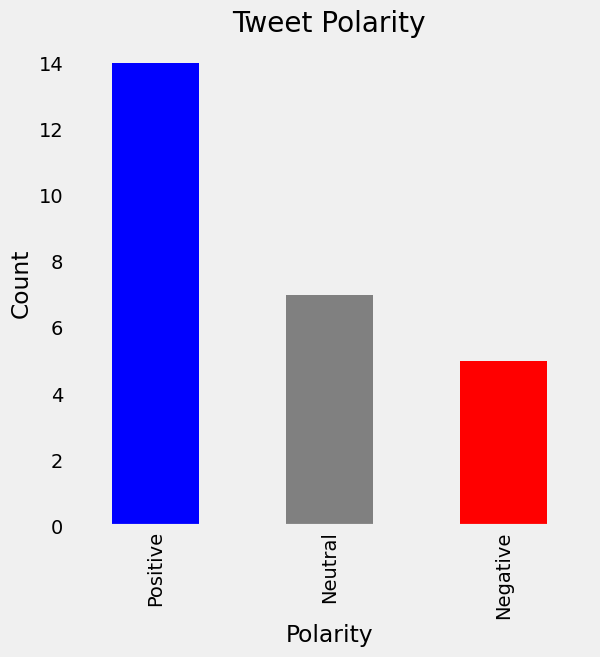

In [30]:
#I decide to plot a bar graph and pie chart for each polarity, you can choose any one of you preferences.
#Bar graph
fig = plt.figure(figsize=(6,6))
color = ['blue','grey','red']
savedTweets['Analysis'].value_counts().plot(kind='bar', color = color)
plt.title('Tweet Polarity')
plt.ylabel('Count')
plt.xlabel('Polarity')
plt.grid(False)
plt.show()

Text(0.5, 1.0, 'Distribution of Polarity')

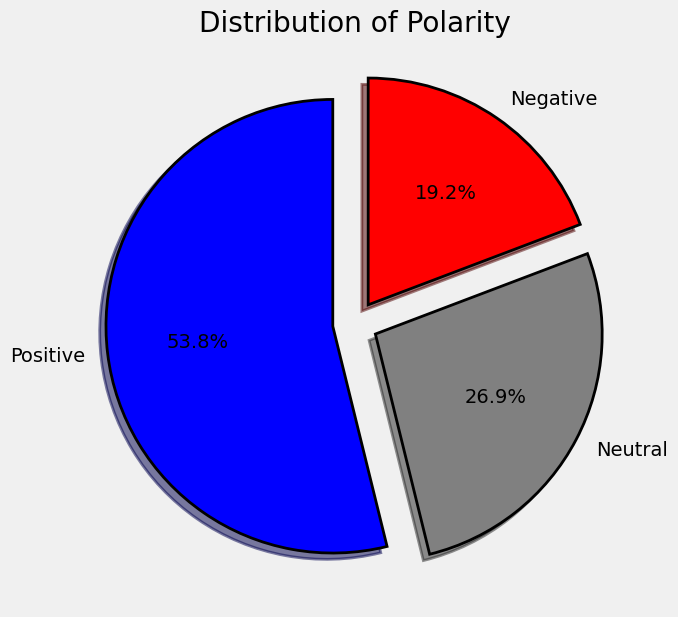

In [26]:

#Pie chart to show percentage distribution of polarity
fig = plt.figure(figsize=(7,7))
colors = ('blue', 'grey', 'red')
wp={'linewidth':2, 'edgecolor': 'black'}
tags=savedTweets['Analysis'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors,
          startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of Polarity')